# Random Forest

__Group: Iñigo Martiarena y Carlos Rodríguez-Viña__

__Lending Club Loan Status Analysis__

# Load Libraries

In [20]:
import xgboost as xgb
import pickle
import seaborn as sns


from numpy import genfromtxt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.svm import SVC
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.feature_selection import RFE
from sklearn import model_selection, metrics, linear_model
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report, ConfusionMatrixDisplay
import scikitplot as skplt
import matplotlib.pyplot as plt
import matplotlib.pyplot as pltimport 
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")
import sklearn.metrics as skm

pd.set_option('display.max_columns', None)

# Load Sample

We load the sample we have created in our notebook called "Sample"

In [2]:
X_ada = pd.read_csv('../data/X_ada.csv', engine = 'python')

In [3]:
y_ada = pd.read_csv('../data/y_ada.csv', engine = 'python')

In [4]:
X_test = pd.read_csv('../data/X_test.csv', engine = 'python')

In [5]:
y_test = pd.read_csv('../data/y_test.csv', engine = 'python')

# Model

We use the python function RandomForestClassifier, with a number of estimators at 200, a learning rate of 0.1, a random state 0f 40 and a loss of deviance for classification,

In [6]:
clf_rf = RandomForestClassifier(random_state=123)
clf_rf.fit(X_ada,y_ada)

<ipython-input-6-ae7f0ceb88f4>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf.fit(X_ada,y_ada)


RandomForestClassifier(random_state=123)

In [7]:
y_rf = clf_rf.predict(X_test)

We proceed with the prediction base on the model we just built, and to calculate the following indicators:

 - Confusion Matrix 
 - Accuracy score. 
 - Recall Score.
 - Precision.
 - Roc Auc score.
 - F1 score
 


### Confusion Matrix

In [8]:
confusion_matrix(y_test, y_rf)

array([[16938,  3498],
       [ 4478, 57954]], dtype=int64)

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

ConfusionMatrixDisplay(confusion_matrix(y_test, y_rf))

According to our confussion Matrix we can interpretate the following:

 - 16.938 True Negatives. We have predicted "Charged Off" and in real they are "Charged Off".
 - 3.498 False Positives. We have predicted "Fully Paid" in reality "Charged Off".
 - 4.478 Flase Negatives. We have predicted "Charge Off" in reality "Full Paid".
 - 57.954 True Postives. We have predicted "Fully Paid" and in real they are "Fully Paid".

Of a total sample of 81.890 observations our model has predicted wrong 7.976, which is a 10% of the total

### Accuracy Score

In [10]:
accuracy_score(y_test, y_rf)

0.9037505430322923

With this model we were able to obtain a 96,77% of accuracy, which means if we have 100 observation we are able to predict altmost 97% right. The issue with this score is when our model is imbalanced, meaning this score can deceive us into believing that a bad model is a good model. So to be certain we are going to use the balanced_accuracy.

In [27]:
balanced_accuracy_score(y_test, y_rf, sample_weight=None, adjusted=False)

0.8785527179701874

We can see that our score has drop down to 95%, but still is a pretty great model.

### Recall Score & Precision Score

In [12]:
recall_score(y_test, y_rf)

0.928273962070733

The ratio is number of true positives/(true positives + false negatives), it informs us about the quantity that our model can predict being 1 the best value and 0 the worst values, in our case we have obtain an outstanding result

In [13]:
precision_score(y_test, y_rf)

0.9430775239211091

The precision is intuitively the ability of the classifier not to label as positive a sample that is negative being best value 1 and worst value 0.

We have obtain a rather unusual Recall & Precision score, normally this scores have an inverse correlation, so how is it possible to have obtain a rather great scores, several reasons:

 - Imbalanced Sample.
 - We have missed important variables in our selection.
 - Our model is so train that is bias towards certain results.
 - We have created a great model

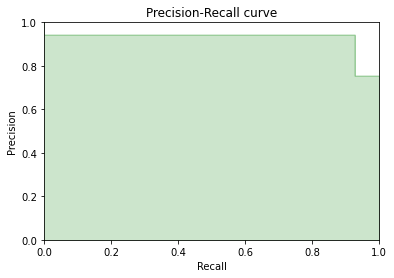

In [14]:
#Precision-Recall
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _= precision_recall_curve(y_test, y_rf)
plt.step(recall, precision, color='g', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='g', step='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.show()


We can see that the precision-recall curve is quite good for our model, that is because it is because we have worked with a balance sample, this metric is best for imbalanced datasets.

### F1 Score

What if you want to balance the two objectives: high precision and high recall? Or, as a pirate captain, you want to optimize towards capturing treasure and avoiding mutiny? We calculate the F1-score as the harmonic mean of precision and recall to accomplish just that.

In [15]:
from sklearn.metrics import f1_score

def f1score (a, b):
    return (precision_score(y_test, y_rf)*recall_score(y_test, y_rf))/(precision_score(y_test, y_rf)+recall_score(y_test, y_rf))


In [16]:
f1score(y_test, y_rf)

0.46780859513738654

Our f1 score show us that the mean between the precision score and the recall score, being a 45% we consider is a good result and our model focueses both in recall and precision, so if we wanted to increase one over the other there would not be any inconvineance.

### ROC AUC 

The ROC is created by the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, recall or probability of detection in machine learning.

In [17]:
roc_auc_score(y_test, y_rf)

0.8785527179701874

### Cumulative Gains Curve

The cumulative gains chart shows the percentage of the overall number of cases in a given category "gained" by targeting a percentage of the total number of cases.

The cumulative gains curve is an evaluation curve that assesses the performance of the model and compares the results with the random pick. It shows the percentage of targets reached when considering a certain percentage of the population with the highest probability to be target according to the model.

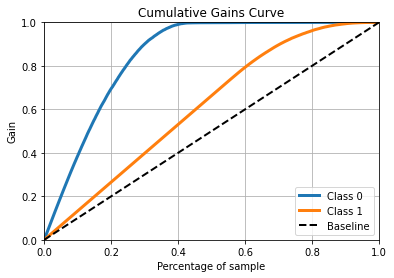

In [25]:
predicted_probabilities = clf_rf.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, predicted_probabilities)
plt.show()

From the Cumulative Gain Curve we can ontain that studying 60% of the sample we have 80%  with the highest probability are located. If we target 60% of the observations, the model will ensuere 80% of the churners in total are in this group.

### Important Features

In [26]:
import eli5
eli5.show_weights(clf_rf)

Weight,Feature
0.4606 ± 0.1534,x25
0.0434 ± 0.0292,x11
0.0361 ± 0.0240,x12
0.0293 ± 0.0403,x4
0.0241 ± 0.0058,x24
0.0239 ± 0.0067,x26
0.0209 ± 0.0207,x10
0.0203 ± 0.0539,x23
0.0200 ± 0.0077,x8
0.0183 ± 0.0216,x45


For this model the weights of the features are more distributed, being feature 25 the one with the highest weight.

### Conclusión

In [14]:
print("The results of our Random Forest Model")


print("accuracy score", accuracy_score(y_test, y_rf))
print("balanced accuracy score", balanced_accuracy_score(y_test, y_rf))
print("recall score", recall_score(y_test, y_rf))
print("precision score", precision_score(y_test, y_rf))
print("roc auc score", roc_auc_score(y_test, y_rf))

The results of our Random Forest Model
accuracy score 0.9037505430322923
balanced accuracy score 0.8785527179701874
recall score 0.928273962070733
precision score 0.9430775239211091
roc auc score 0.8785527179701874


After comparing the results with out other best model, we have decide to stay with the XGBoost, Henceforth we will only apply hyperparameters for this one only

After reviewing several of the results we have concluded the following:

    1) Our dataset is imbalance so the results we have obtain are normal because they are biased.
    2) Our model is so train that the bias affects our results.
    3) During the selection of the variables we have add or remove important variable that affect the results.
    4) We have built a very robust and precise model.

In [28]:
pickle.dump(clf_rf, open("clf_rf", "wb"))

### References

To built our model we have search many sources of informaction through the internet.

https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451 # parameters

https://scikit-learn.org/stable/modules/naive_bayes.html # naive model

https://towardsdatascience.com/tagged/scikit-learn # sk

https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf # pipelines

https://medium.com/@benfenison/gridsearching-a-random-forest-classifier-fc225609699c # rf

https://medium.com/fintechexplained/how-to-save-trained-machine-learning-models-649c3ad1c018 # pickle

https://machinelearningmastery.com/rfe-feature-selection-in-python/ # feature engineering

https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c # precision and recall

https://towardsdatascience.com/meaningful-metrics-cumulative-gains-and-lyft-charts-7aac02fc5c14 # cumulative gain

https://towardsdatascience.com/evaluate-model-performance-with-cumulative-gains-and-lift-curves-1f3f8f79da01 # cumulative gain

https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/#:~:text=true%20positives%20(TP)%3A%20These,they%20do%20have%20the%20disease.&text=false%20positives%20(FP)%3A%20We,actually%20do%20have%20the%20disease. # confusion matrix


https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c# roc curve

